# **Soil Water Drainage Assessment Using Fast Fourier Transform** <br />

**Drainage of irrigated soils for one growing season of various crops and soil types.**<br/>  


## Prepared by B. Keith Bellingham, <br />
Soil Scientist, <br />
November  15, 2022<br/>
https://www.linkedin.com/in/bkbellingham/


In [37]:
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from IPython.display import display, Math, Latex

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


# Introduction and Theory

**Introduction**<br />
The drainage of soil has important implications for irrigated agriculture and thus food security.  Poorly drained soils may lead to anaerobic conditions resulting in reduced crop yields. Also, poorly drained soils on irrigated lands is a leading cause of salinity buildup. Saline soils become infertile for most crops and can be very expensive to reclaim the soil for agriculture once becoming saline. <br />

On the other hand, excessive drainage of soils on irrigated lands may leach nitrates downward contaminating aquifers. Fertigation is nutrient rich irrigation water often made from dairy or swine effluent and is commonly used to irrigate crops. While crops benefit from the nutrient rich irrigation water, there is a risk that the nutrient rich water will leach downward to the aquifer contaminating local drinking water and polluting local surface water.  The irrigator must balance the drainage of the soil with crop health and the environmental impacts. <br />

Because the gravity driven movement of water is orders of magnitude faster than capillary driven movement of water,  a Fast Fourier Transform (FFT) of the time series soil moisture data offers a possible method for assessing the extent to which a soil is draining during  irrigation cycles within a season. In this study soil moisture sensors at multiple depths were deployed in four different kinds of soils from highly drained organic grow media to poorly drained silty clay loam. These four soils had various irrigation schedules from daily to weekly. The crops include cannabis, blueberries, and corn. <br/>
The hypotheses are as follows: <br />

1)	If the frequency of soil moisture at the surface is the same as the frequency of moisture at a deeper depth, than the water flow is driven by gravity and the soil experienced water drainage. <br />
2)	If the frequency of soil moisture at the surface is greater than the moisture frequency at a deeper depth, or if there is no periodicity of soil moisture at a deeper depth, then the movement of water is primarily driven by capillary forces and thus the soil is not experiencing significant drainage.   <br />   
   
For the duration of a single growing season, the time series soil moisture data for these four soils at multiple depths were collected. A Fast Fourier Transform on the discrete Fourier Transform was performed to determine the frequencies of soil moistures which loosely correlate to the irrigation schedule. The FFT frequencies reflecting gravity driven flow range from once per week to every three hours.  A drainage index was calculated from the periodogram produced by FFTs at two depths for each soil. The drainage index $I_d$ does not necessarily represent an intrinsic soil property, but represents the extent of gravity driven water flow between the two sensors and different depths for a growing season.  

**Theory**<br />
The relationship between soil moisture percentage, water flow, and crop health is not straightforward and usually not well understood.  Techniques and tools commonly used in the field of data science are used to understand drainage.   

Water movement in soil is driven by two physical forces, gravity, and capillarity. If the soil is completely saturated or very wet (after an irrigation event), the primary force acting on the water will be gravity and can be best described by Darcy’s Law; 


$$\frac{\partial \theta}{\partial t} = flow  = -K_s(dh/dz)$$

Where $\theta$  is volumetric soil moisture, $K_s$ is the saturated hydraulic conductivity, *h* is hydraulic head and *z* is depth.  

After gravity gets finish pulling the water out of the soil, the predominant force acting on the water is capillary forces which is the force of the surface tension between water and air. Water movement from capillary forces is commonly called “wicking” and is described by the Richard’s Equation;


$$\frac{\partial \theta}{\partial t} = flow  =   \frac{\partial (K_h   \frac{\partial h}{\partial z}         }{\partial z} )  + \frac{\partial K_h} {\partial z }   -S(h) $$    


In the Richard’s equation $K_h$ is now the head dependent hydraulic conductivity, and $-S(h)$ is basically evaporation. 

Water movement driven by the force of gravity after an irrigation event is associated with drainage. While the movement of water driven by capillary forces is three dimensional with a downward component, the upward component will be large during a growing season from evapotranspiration (ET). It is this strong upward water flux from evapotranspiration during the growing season is the reason why there is no major downward water flux from capillarity. The capillary driven movement of water in soil is a much slower process than a gravity driven flow. From the flow equations, the hydraulic conductivity in Darcy’s law $K_s$ is a constant based on the properties of the soil where the $K_h$ in the Richards equation is dependent on hydraulic head.  Therefore, the periodicity of changes in soil moisture from weekly to hourly will be predominately gravity driven. 


**The Fast Fourier Transform**<br/>
A Fast Fourier Transform (FFT) is a numeric solution to a discrete Fourier Transform, which takes time series data and identifies frequencies of occurrence in a periodogram. The FFT output is a complex number representing the center of mass of the plot of  rotational winding frequencies aroound a circle. This can be expressed using Euler’s formula:
 
$$e^{jx}= cosx +jsinx $$

Where j is $\sqrt(-1)$ , and x is the radial distance. The complex sine and cosine term are the transformed coordinates of the radial distance.  

The Fourier Transform becomes:

$$\hat{g}(f) =    \int_{t_1}^{t_2} g(t) e^{-2 \pi j f t}   dt$$


Where $g(t)$ is the soil moisture time series data. The complex conjugate of the FFT output is:

$\lambda$  = a + jb

In the power density spectrum, I took the absolute value or the magnitude of the complex number using Pythagorean Theorem to construct a periodogram of power verses frequency. 

Power  = $|\lambda| = \sqrt(a^2 + b^2)$ 

The frequencies associated with gravity driven flow are once per week to once every three hours for the soils observed. A drainage index ($I_d$) from the periodograms at two different depths can be defined to assess drainage. <br/>
 
The frequency selection is based on a variable “$m_x$”. Where $ m_x$ is defined as 50% of maximum power of the top sensor for frequencies from weekly to every 3 hours.  Therefore, the drainage index, $I_d$  can be expressed as: <br/>

$Top_i$ = the sum of the number of powers of the top sensor > $m_x$<br/>
$Bottom_i$ = the sum of the number of powers of the bottom sensor > $m_x$ 

$I_d$  =    $Bottom_i$  /   $Top_i$ 

The larger the index, the more the gravity driven water flow there was for a given growing season.  Because the index is the ratio of the bottom to the upper frequencies, the index value should be comparable across different types of soils and irrigation schedules.  
**Methods**<br/>
Four different irrigation regimes were modeled for one growing season.  Each irrigation regime varies with soil type, irrigation strategy, and crop.  Each have multiple soil moisture sensors placed at various depths. Soil moisture is logged on an interval ranging from every 5 minutes to hourly. 


# Soil 1, Organic Grow Media, High Drainage

**Soil 1, High drainage:**<br/>
The soil is a organic grow media 70:30 coco coir with perlite. <br/>
Crop: Indoor Grown Cannabis <br/>
Irrigation Goal: To get irrigation water to drain out of the bottom of the grow media with a 20% targeted run off <br/>
Sensor depths: Top and with 19 cm. (19 cm  separation).<br/>


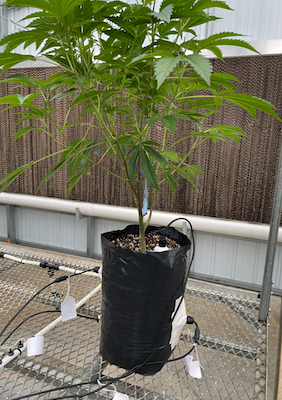

In [38]:
#Bring data in.
a9b_df = pd.read_csv("https://raw.githubusercontent.com/KeithBellingham/testdata/main/A9_SMEC_ALL.csv",sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

a9_df = a9b_df.sort_index(ascending=False)
a9_df.head()

Timestamp  SM%_Top  EC_Top  SM%_4  EC_4  SM%_11  EC_11  SM%_20  EC_20
5471  2/21/22 0:00     44.5    0.40   58.3  0.75    47.1   0.46    32.8   0.18
5470  2/21/22 0:15     42.0    0.38   61.0  0.86    48.3   0.47    31.9   0.17
5469  2/21/22 0:30     40.7    0.37   61.5  0.83    47.9   0.48    31.6   0.17
5468  2/21/22 0:45     40.4    0.35   61.5  0.83    47.9   0.48    31.4   0.18
5467  2/21/22 1:00     39.8    0.35   61.6  0.85    47.9   0.48    31.6   0.17

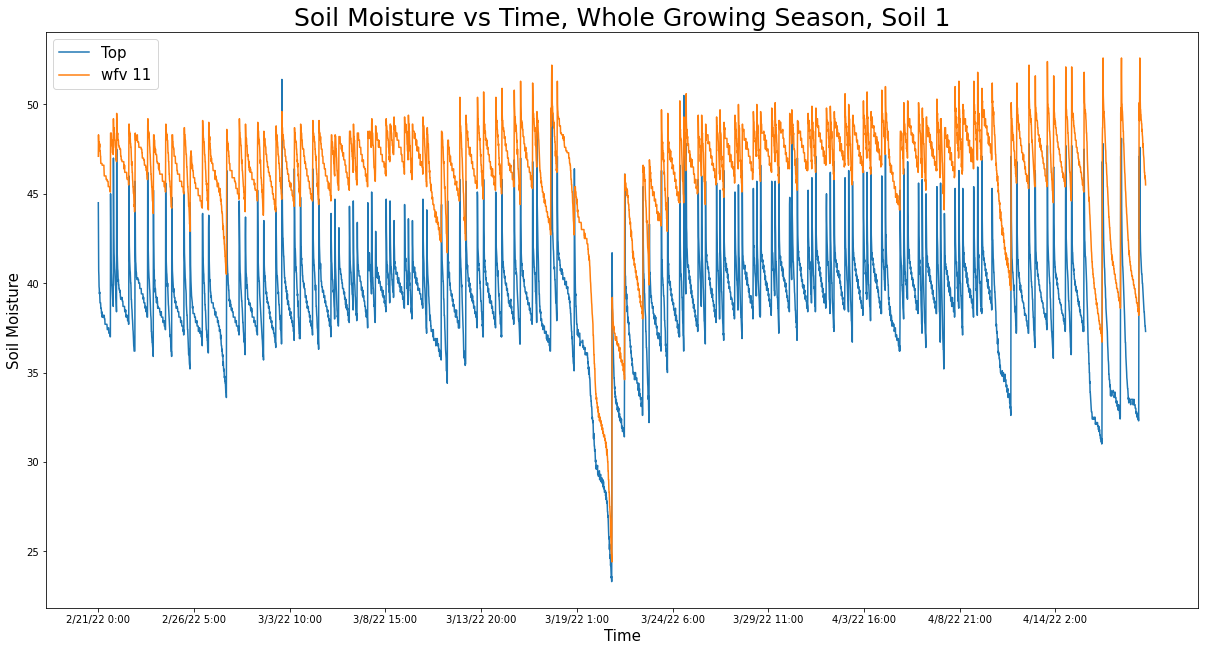

In [39]:
#Make Graph of whole two month growing season
x = a9_df['Timestamp']
y = a9_df['SM%_Top']
y_2 = a9_df['SM%_11'] 


fig = plt.figure(figsize=(16,8))
axes_4 = fig.add_axes([0,0,1,1]) 
axes_4.set_xlabel('Time' ,fontsize=15,) 
axes_4.set_ylabel('Soil Moisture',fontsize=15)
axes_4.set_title('Soil Moisture vs Time, Whole Growing Season, Soil 1',fontsize=25)
axes_4.plot(x, y, label='Top')
axes_4.plot(x, y_2, label='wfv 11')

axes_4.legend(loc='best',fontsize=15)

axes_4.set_xticks(np.arange(0, len(x)+1, 500))

plt.show()

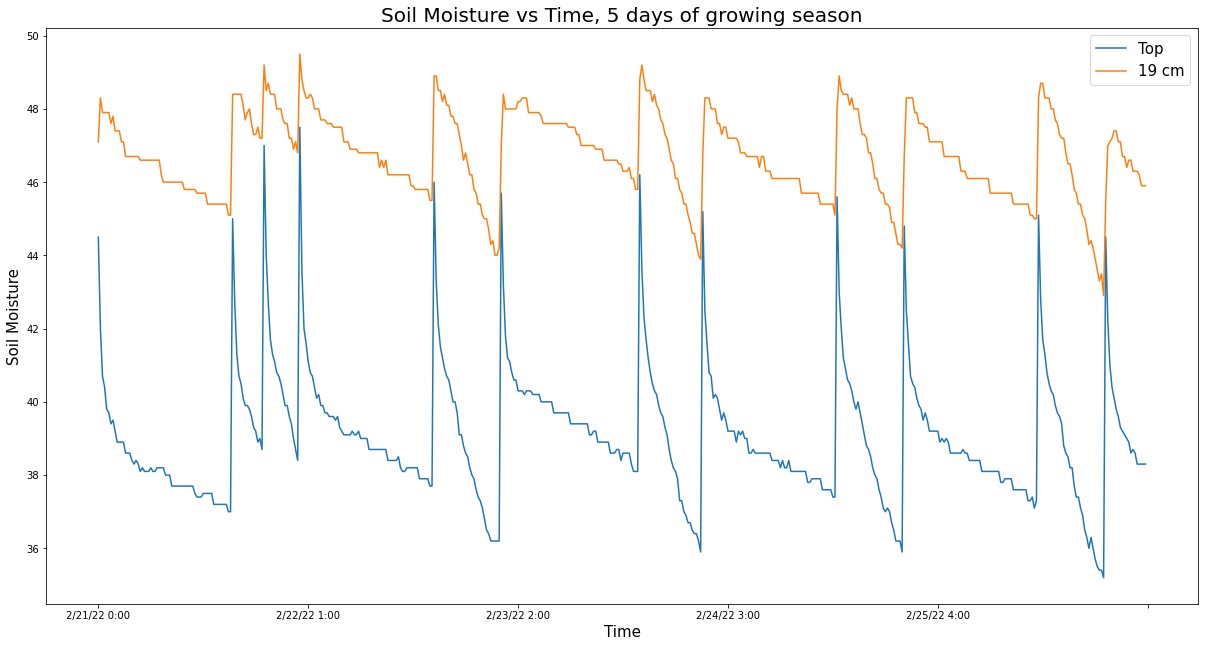

In [40]:
#Make plot of a few days of the growing season.
x = a9_df['Timestamp'][0:500]
y = a9_df['SM%_Top'][0:500]
y_2 = a9_df['SM%_11'][0:500] 

fig = plt.figure(figsize=(16,8))
axes_4 = fig.add_axes([0,0,1,1]) 
axes_4.set_xlabel('Time' ,fontsize=15,) 
axes_4.set_ylabel('Soil Moisture',fontsize=15)
axes_4.set_title('Soil Moisture vs Time, 5 days of growing season',fontsize=20)
axes_4.plot(x, y, label='Top')
axes_4.plot(x, y_2, label='19 cm')

axes_4.legend(loc='best',fontsize=15)
axes_4.set_xticks(np.arange(0, len(x)+1, 100))


plt.show()

The Max Power/2 is  1193.2708740234375 The sum of the top and bottom sensor frequencies are 4 & 3
The drainage index for soil 1 is   0.75


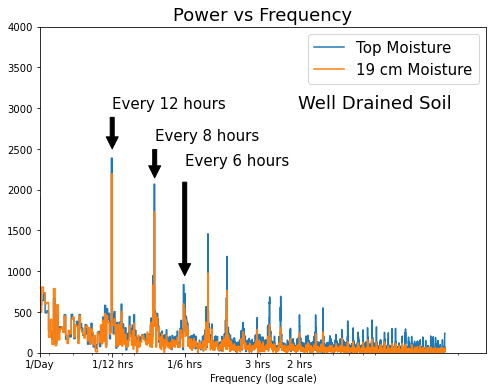

In [41]:
fft_a = a9_df['SM%_Top']
fft_b = a9_df['SM%_11']

fft_1 = tf.signal.rfft(fft_a)
fft_2 = tf.signal.rfft(fft_b)

f_per_dataset = np.arange(0, len(fft_1))

n_samples_h = len(fft_a)
hours_per_year = 4*24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset

#Make Graph
plt.step(f_per_year, np.abs(fft_1), label = 'Top Moisture')
plt.step(f_per_year, np.abs(fft_2),label = '19 cm Moisture')
plt.xscale('log')
plt.ylim(0, 4000)
plt.xlim([700, np.max(plt.xlim())])
plt.xticks([365 ,730, 1460, 2920, 4381], labels=['1/Day' , '1/12 hrs', '1/6 hrs', '3 hrs', '2 hrs'])
plt.title('Power vs Frequency',fontsize=18)

plt.annotate('Every 12 hours', xy=(730 ,2450),fontsize=15, xytext=(730, 3000),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every 6 hours', xy=(1460 ,800),fontsize=15, xytext=(1460, 2300),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every 8 hours', xy=(1095.75 ,2100),fontsize=15, xytext=(1095.75, 2600),
                arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4300, 3000, 'Well Drained Soil', fontsize = 18)

plt.legend(loc='best',fontsize=15)

_ = plt.xlabel('Frequency (log scale)')

#Make index DF


index = pd.DataFrame()
index['Top'] = np.abs(fft_1)
index['low2'] = np.abs(fft_2)
index['Freq'] = f_per_year


indexA = index[ (index['Freq'] > 365) & (index['Freq'] < 4381) ]
mx = indexA['Top'].max() * 0.5
top_i = len(indexA[indexA['Top'] > mx])
bottom_i = len(indexA[indexA['low2'] > mx])


indexB = bottom_i/top_i


print("The Max Power/2 is ",mx, "The sum of the top and bottom sensor frequencies are", top_i,"&", bottom_i)
print("The drainage index for soil 1 is  ",indexB) 

# Soil 2, Silt Loam, Medium Well Drained

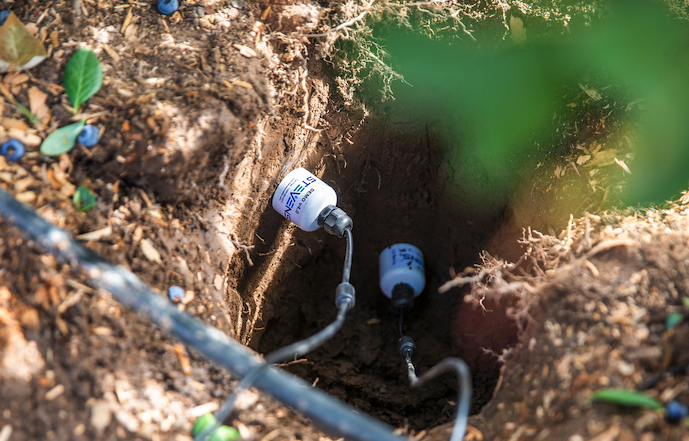

**Soil 2, Silt loam, well drained**<br/> 
In a blueberry crop, this silt loam soil is of an alfasol order and was irrigated using underground drip emitters.  Data from two soil sensors were model one at 6 inches below surface and the other at 12 inches below surface. The soil is moderately well drained. <br/> 

Irrigation Goal: To get irrigation water past the 24 inch depth to roots at a 36 inch depth<br/>
Sensor Depth: 6 and 12 inches, (6 inch separation). <br/>

USDA Soil Profile Survey<br/>

Soil Horizon |Depth | Soil Texture Class
--------:|:------------:|:-----------:
H1 | 0 to 16 inches |silt loam
H2 |16 to 38 inches |silty clay loam
H3 |38 to 60 inches |silt loam


In [42]:
dfbb = pd.read_csv("https://raw.githubusercontent.com/KeithBellingham/testdata/72b5e0840af41b9c64d6431fe05e814b535d2280/BBfarm2022.csv")

dfbb.head()

Timestamp  12inchCTR Soil Moisture %  12inchFFR Soil Moisture %  \
0  6/1/22 0:00                       38.7                       30.2   
1  6/1/22 0:05                       38.7                       30.2   
2  6/1/22 0:10                       38.7                       30.2   
3  6/1/22 0:15                       38.7                       30.2   
4  6/1/22 0:20                       38.7                       30.2   

   6inchCTR Soil Moisture %  6InchFFR Soil Moisture %  
0                      36.7                      25.1  
1                      36.5                      25.1  
2                      36.5                      25.1  
3                      36.5                      25.1  
4                      36.7                      25.1

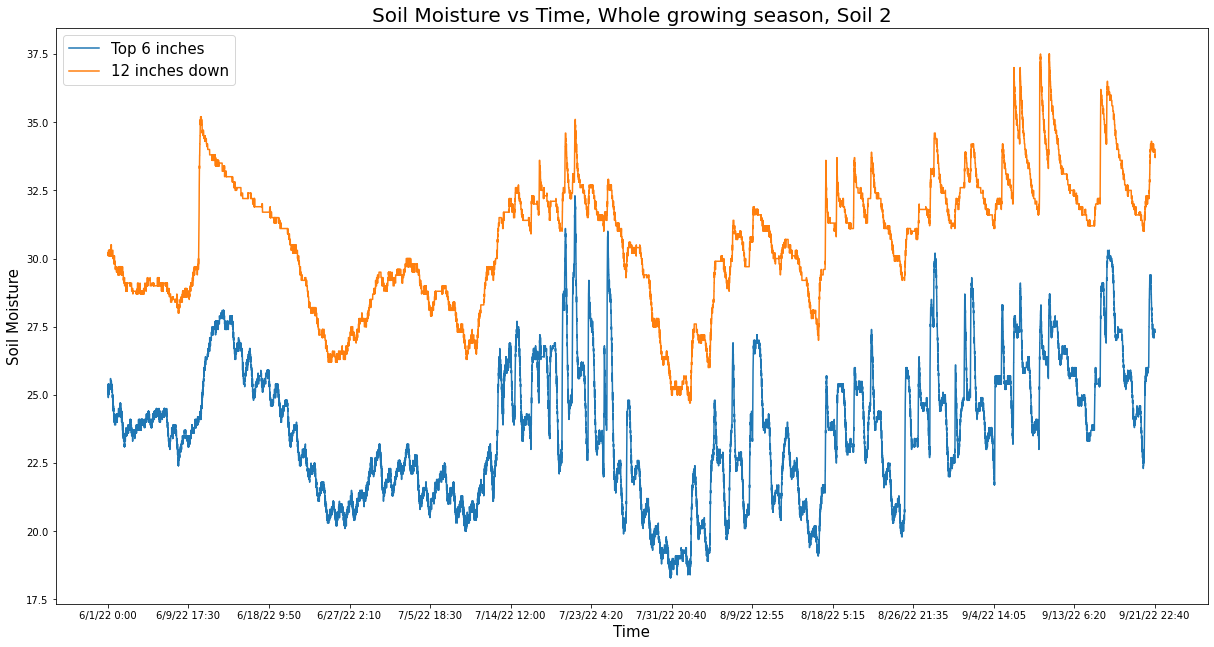

In [43]:
#Make Graph of whole two month growing season
x = dfbb['Timestamp']
y = dfbb['6InchFFR Soil Moisture %']
y_2 = dfbb['12inchFFR Soil Moisture %'] 


fig = plt.figure(figsize=(16,8))
axes_4 = fig.add_axes([0,0,1,1]) 
axes_4.set_xlabel('Time' ,fontsize=15,) 
axes_4.set_ylabel('Soil Moisture',fontsize=15)
axes_4.set_title('Soil Moisture vs Time, Whole growing season, Soil 2',fontsize=20)
axes_4.plot(x, y, label='Top 6 inches')
axes_4.plot(x, y_2, label='12 inches down')

axes_4.legend(loc='best',fontsize=15)

axes_4.set_xticks(np.arange(0, len(x)+1, 2500))

plt.show()

The Drainage Index for soil 2 is:  0.2727272727272727
Bottom i is  3 Top i is  11


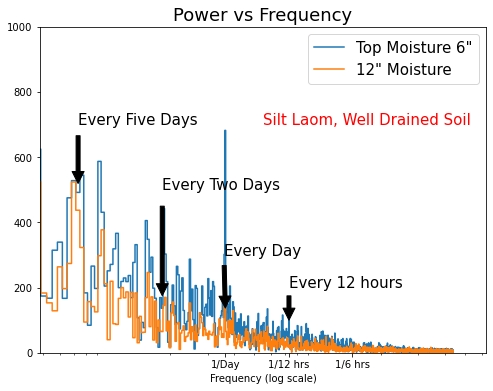

In [44]:
#FFT Soil 2
#Silt Loam well drained soil
dfbb2 = dfbb[12::12]


fft_a = dfbb2['6InchFFR Soil Moisture %']
fft_b = dfbb2['12inchFFR Soil Moisture %']

fft_1 = tf.signal.rfft(fft_a)
fft_2 = tf.signal.rfft(fft_b)


f_per_dataset = np.arange(0, len(fft_1))

n_samples_h = len(fft_a)
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset

#Make Graph
plt.step(f_per_year, np.abs(fft_1), label = 'Top Moisture 6"')
plt.step(f_per_year, np.abs(fft_2),label = '12" Moisture')

plt.xscale('log')
plt.ylim(0, 1000)
plt.xlim([48, np.max(plt.xlim())])

plt.xticks([365 ,730, 1460], labels=['1/Day' , '1/12 hrs', '1/6 hrs',])
plt.title('Power vs Frequency',fontsize=18)

plt.annotate('Every 12 hours', xy=(730 ,90),fontsize=15, xytext=(730, 200),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every Day', xy=(365 ,120),fontsize=15, xytext=(359, 300),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every Five Days', xy=(73 ,500),fontsize=15, xytext=(73, 700),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every Two Days', xy=(183 ,140),fontsize=15, xytext=(183, 500),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.text(550, 700, 'Silt Laom, Well Drained Soil', fontsize = 15, color = 'r')

plt.legend(loc='best',fontsize=15)

_ = plt.xlabel('Frequency (log scale)')

#Make index DF

index = pd.DataFrame()
index['Top'] = np.abs(fft_1)
index['low2'] = np.abs(fft_2)
index['Freq'] = f_per_year


indexA = index[ (index['Freq'] > 51) & (index['Freq'] < 729) ]
mx = indexA['Top'].max() * 0.5
top_i = len(indexA[indexA['Top'] > mx])
bottom_i = len(indexA[indexA['low2'] > mx])


indexB = bottom_i/top_i




print("The Drainage Index for soil 2 is: ", indexB) 
print("Bottom i is ", bottom_i, "Top i is ", top_i)



# Soil 3, Silty Clay, Poor Drainage

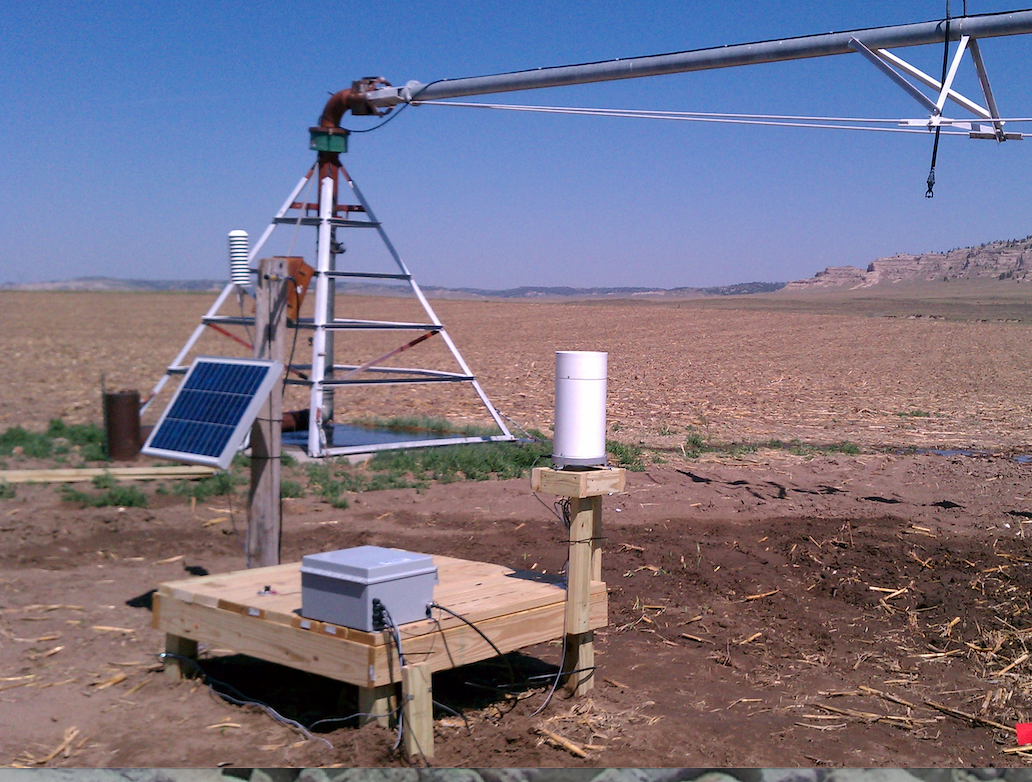

**Soil 3. Silty Clay Loam, Poorly Drained:**<br/> 
Crop: Corn<br/>
Irrigation Goal: Using an overhead center pivot, water is fertigated and not allowed to leach nitrates into ground water. <br/>
Sensor Depth: 6 and 24 inches, (18 inch separation). <br/>

USDA Soil Profile Survey<br/>

Soil Horizon |Depth | Soil Texture Class
--------:|:------------:|:-----------:
Ap, A1,A2 |0 to 23  inches |silty clay loam
Bg |23 to 30 inches |silty clay loam
C |30 to 60 inches | loam


In [45]:
clay = pd.read_csv("https://raw.githubusercontent.com/KeithBellingham/testdata/main/ND_Clay_2022.csv",sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

clay.head()

Timestamp  12_in_Moisture%  18_in_ Moisture%  24_in_Moisture%  \
0  7/16/22 0:00             47.0              42.4             39.9   
1  7/16/22 0:15             47.0              42.4             39.9   
2  7/16/22 0:30             47.0              42.4             39.9   
3  7/16/22 0:45             47.0              42.4             39.9   
4  7/16/22 1:00             47.0              42.4             39.9   

   6_in_Moisture%  
0            40.0  
1            39.9  
2            40.4  
3            40.4  
4            40.4

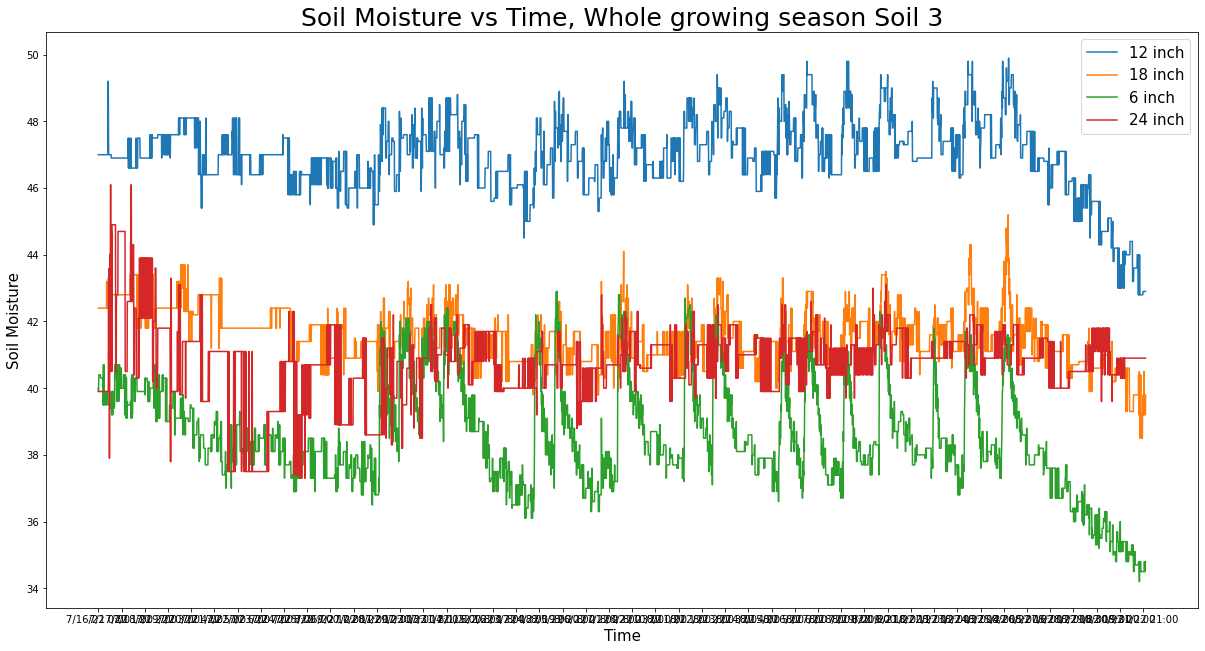

In [46]:
x = clay['Timestamp']
y = clay['12_in_Moisture%']
y_2 = clay['18_in_ Moisture%']
y_3 = clay['6_in_Moisture%']
y_4 = clay['24_in_Moisture%']

fig = plt.figure(figsize=(16,8))
axes_4 = fig.add_axes([0,0,1,1]) 
axes_4.set_xlabel('Time' ,fontsize=15,) 
axes_4.set_ylabel('Soil Moisture',fontsize=15)
axes_4.set_title('Soil Moisture vs Time, Whole growing season Soil 3',fontsize=25)
axes_4.plot(x, y, label='12 inch')
axes_4.plot(x, y_2, label='18 inch')
axes_4.plot(x, y_3, label='6 inch')
axes_4.plot(x, y_4, label='24 inch')

axes_4.legend(loc='best',fontsize=15)
axes_4.set_xticks(np.arange(0, len(x)+1, 100))


plt.show()

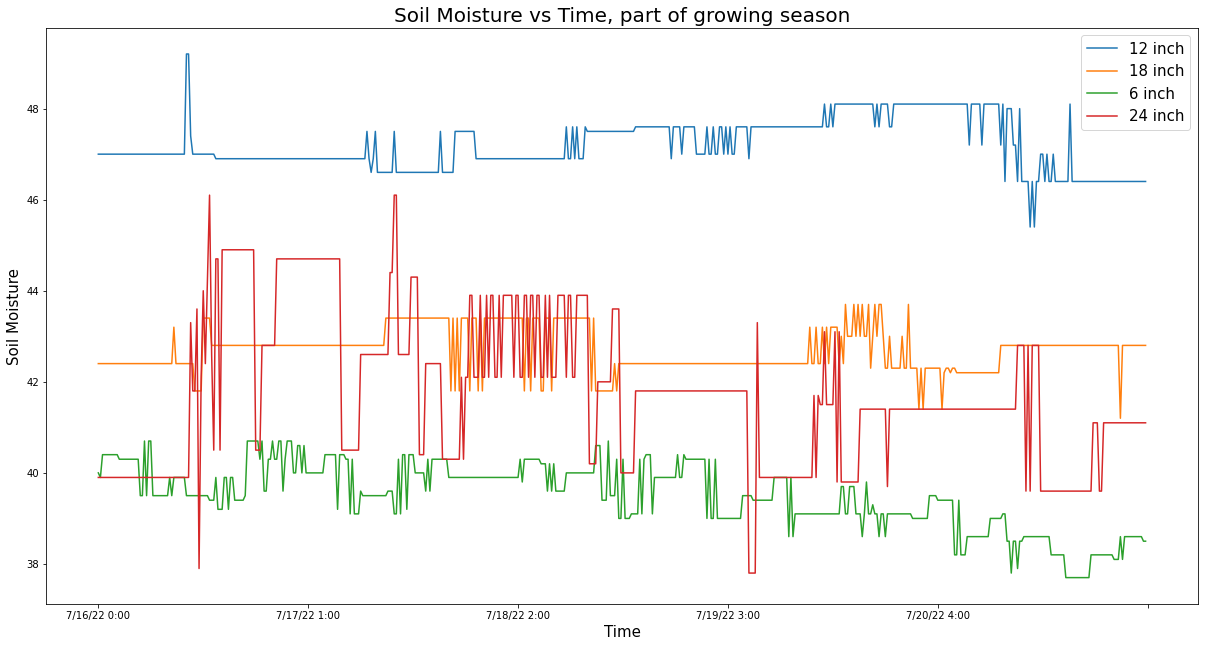

In [47]:
#Graph part of growing season soil 3. 
x = clay['Timestamp'][0:500]
y = clay['12_in_Moisture%'][0:500]
y_2 = clay['18_in_ Moisture%'][0:500] 
y_3 = clay['6_in_Moisture%'][0:500] 
y_4 = clay['24_in_Moisture%'][0:500] 

fig = plt.figure(figsize=(16,8))
axes_4 = fig.add_axes([0,0,1,1]) 
axes_4.set_xlabel('Time' ,fontsize=15,) 
axes_4.set_ylabel('Soil Moisture',fontsize=15)
axes_4.set_title('Soil Moisture vs Time, part of growing season',fontsize=20)
axes_4.plot(x, y, label='12 inch')
axes_4.plot(x, y_2, label='18 inch')
axes_4.plot(x, y_3, label='6 inch')
axes_4.plot(x, y_4, label='24 inch')

axes_4.legend(loc='best',fontsize=15)
axes_4.set_xticks(np.arange(0, len(x)+1, 100))


plt.show()

1/2 of max power is 186.9799041748047 Top power count is 7 bottom power count is  0
drainage index for soil 3 is  0.0


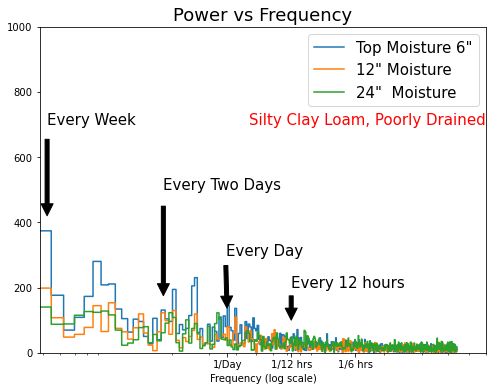

In [48]:
#Soil 3
#Silty Clay Loam FFT
clay = clay[0::4]
fft_a = clay['6_in_Moisture%']
fft_b = clay['12_in_Moisture%']
fft_c = clay['24_in_Moisture%']

fft_1 = tf.signal.rfft(fft_a)
fft_2 = tf.signal.rfft(fft_b)
fft_3 = tf.signal.rfft(fft_c)


f_per_dataset = np.arange(0, len(fft_1))

n_samples_h = len(fft_a)
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset

#Make Graph
plt.step(f_per_year, np.abs(fft_1), label = 'Top Moisture 6"')
plt.step(f_per_year, np.abs(fft_2),label = '12" Moisture')
plt.step(f_per_year, np.abs(fft_3),label = '24"  Moisture')

plt.xscale('log')
plt.ylim(0, 1000)
plt.xlim([48, np.max(plt.xlim())])
plt.xticks([365 ,730, 1460], labels=['1/Day' , '1/12 hrs', '1/6 hrs',])
plt.title('Power vs Frequency',fontsize=18)

plt.annotate('Every 12 hours', xy=(730 ,90),fontsize=15, xytext=(730, 200),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every Day', xy=(365 ,120),fontsize=15, xytext=(359, 300),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every Week', xy=(52 ,390),fontsize=15, xytext=(52, 700),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every Two Days', xy=(183 ,140),fontsize=15, xytext=(183, 500),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.text(460, 700, 'Silty Clay Loam, Poorly Drained', fontsize = 15, color = 'r')

plt.legend(loc='best',fontsize=15)

_ = plt.xlabel('Frequency (log scale)')


#Compare periodograms
#Make index DF

index = pd.DataFrame()
index['Top'] = np.abs(fft_1)
index['low2'] = np.abs(fft_2)
index['low3'] = np.abs(fft_3)
index['Freq'] = f_per_year


indexA = index[ (index['Freq'] > 51) & (index['Freq'] < 731) ]
mx = indexA['Top'].max() * 0.5
top_i = len(indexA[indexA['Top'] > mx])
bottom_i = len(indexA[indexA['low3'] > mx])


indexB = bottom_i/top_i



print("1/2 of max power is", mx,"Top power count is", top_i, "bottom power count is ",bottom_i)
print("drainage index for soil 3 is ",indexB) 


# Soil 4, Silty Clay Loam, Poor Drainage

**Soil 4. Silty Clay Loam, Poorly Drained:**<br/> 
Crop: Corn<br/>
Irrigation Goal: Using an overhead center pivot, water is fertigated and not allowed to leach nitrates into ground water. <br/>
Sensor Depth: 6 and 12 inches, (6 inch separation). <br/>

USDA Soil Profile Survey<br/>

Soil Horizon |Depth | Soil Texture Class
--------:|:------------:|:-----------:
Ap, |0 to 6  inches |silty clay loam
A |6 to 12  inches |silty clay loam
Bt1 |12 to 18  inches |silty clay loam
Bt2 |18 to 45  inches |silty clay loam
BC |45 to 54 inches |silty clay loam
C |54 to 79 inches | silty clay loam


In [49]:
silty_clay = pd.read_csv("https://raw.githubusercontent.com/KeithBellingham/testdata/main/NOD_2022.csv",sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
silty_clay.head()

Timestamp  12_in_ Moisture%  18_in_ Moisture%  24_in_ Moisture%  \
0  7/16/22 0:00              35.0              29.6              31.6   
1  7/16/22 0:15              35.3              29.6              31.6   
2  7/16/22 0:30              35.3              29.6              31.2   
3  7/16/22 0:45              34.4              29.6              31.2   
4  7/16/22 1:00              35.3              30.2              31.2   

   6_in_Moisture%  
0            37.2  
1            37.2  
2            37.2  
3            37.2  
4            37.5

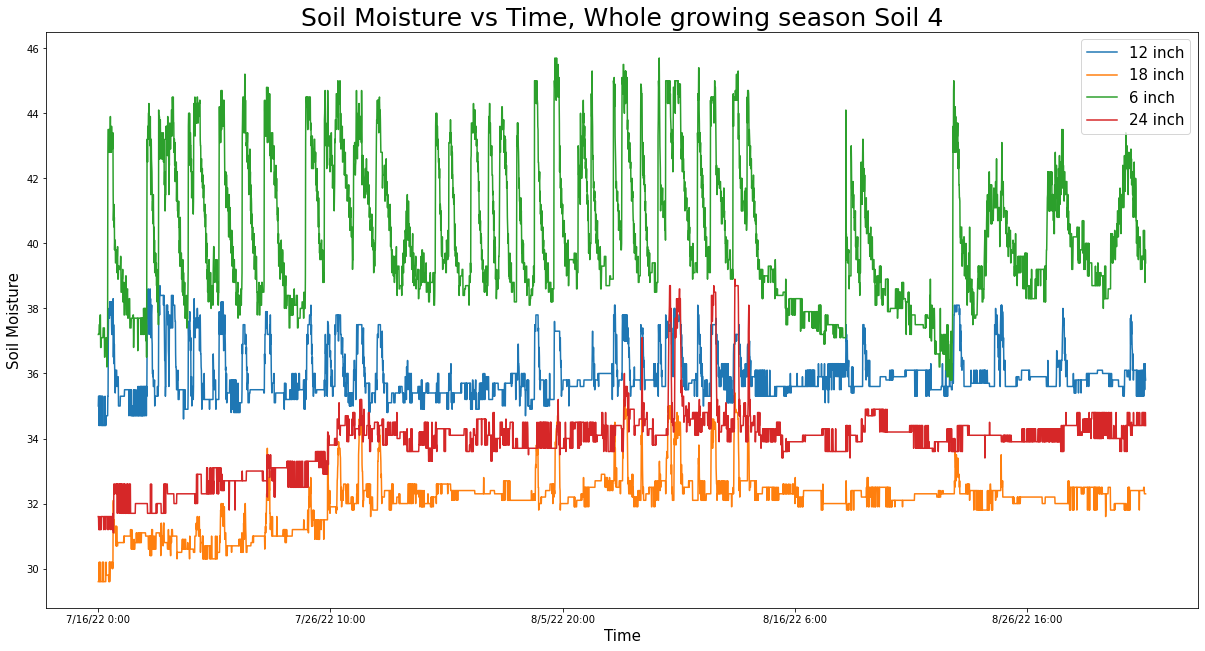

In [53]:
x = silty_clay['Timestamp']
y = silty_clay['12_in_ Moisture%']
y_2 = silty_clay['18_in_ Moisture%']
y_3 = silty_clay['6_in_Moisture%']
y_4 = silty_clay['24_in_ Moisture%']

fig = plt.figure(figsize=(16,8))
axes_4 = fig.add_axes([0,0,1,1]) 
axes_4.set_xlabel('Time' ,fontsize=15,) 
axes_4.set_ylabel('Soil Moisture',fontsize=15)
axes_4.set_title('Soil Moisture vs Time, Whole growing season Soil 4',fontsize=25)
axes_4.plot(x, y, label='12 inch')
axes_4.plot(x, y_2, label='18 inch')
axes_4.plot(x, y_3, label='6 inch')
axes_4.plot(x, y_4, label='24 inch')

axes_4.legend(loc='best',fontsize=15)
axes_4.set_xticks(np.arange(0, len(x)+1, 1000))


plt.show()

1/2 of max power is 178.6304931640625 Top power count is 18 bottom power count is  0
drainage index for soil 4 is  0.0


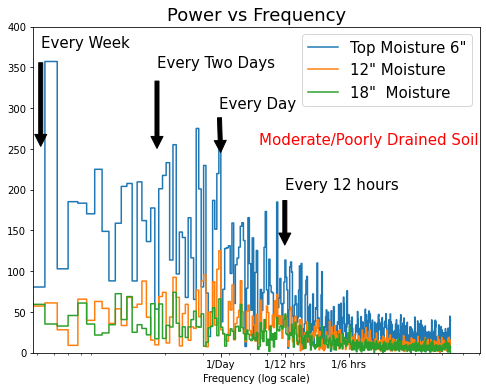

In [54]:
#Soil 4
#Silty Clay Loam FFT
silty_clay = silty_clay[0::4]

fft_a = silty_clay['6_in_Moisture%']
fft_b = silty_clay['12_in_ Moisture%']
fft_c = silty_clay['18_in_ Moisture%']

fft_1 = tf.signal.rfft(fft_a)
fft_2 = tf.signal.rfft(fft_b)
fft_3 = tf.signal.rfft(fft_c)


f_per_dataset = np.arange(0, len(fft_1))

n_samples_h = len(fft_a)
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset

#Make Graph
plt.step(f_per_year, np.abs(fft_1), label = 'Top Moisture 6"')
plt.step(f_per_year, np.abs(fft_2),label = '12" Moisture')
plt.step(f_per_year, np.abs(fft_3),label = '18"  Moisture')

plt.xscale('log')
plt.ylim(0, 400)
plt.xlim([48, np.max(plt.xlim())])
plt.xticks([365 ,730, 1460], labels=['1/Day' , '1/12 hrs', '1/6 hrs',])
plt.title('Power vs Frequency',fontsize=18)

plt.annotate('Every 12 hours', xy=(730 ,125),fontsize=15, xytext=(730, 200),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every Day', xy=(365 ,240),fontsize=15, xytext=(359, 300),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every Week', xy=(52 ,240),fontsize=15, xytext=(52, 375),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.annotate('Every Two Days', xy=(183 ,240),fontsize=15, xytext=(183, 350),
                arrowprops=dict(facecolor='black', shrink=0.1))

plt.text(550, 255, 'Moderate/Poorly Drained Soil', fontsize = 15, color = 'r')

plt.legend(loc='best',fontsize=15)

_ = plt.xlabel('Frequency (log scale)')


#Make index DF


index = pd.DataFrame()
index['Top'] = np.abs(fft_1)
index['low2'] = np.abs(fft_2)
index['Freq'] = f_per_year


indexA = index[ (index['Freq'] > 51) & (index['Freq'] < 729) ]
mx = indexA['Top'].max() * 0.5
top_i = len(indexA[indexA['Top'] > mx])
bottom_i = len(indexA[indexA['low2'] > mx])


indexB = bottom_i/top_i

print("1/2 of max power is", mx,"Top power count is", top_i, "bottom power count is ",bottom_i)
print("drainage index for soil 4 is ",indexB) 


# Results and Discussion

The drainage index is as follows:

Drain Index |Soil Type |Crop |Irrigation Goal | Sensor Separation
--------:|:------------:|:-----------:|:-----------:|:----------
Soil 1 = 0.75 |Organic Grow Media |Cannabis|20% runoff| 19 cm
Soil 2 = 0.27 |Silt Loam |Blueberry | Deep infiltration | 6 inches
Soil 3 = 0 |Silty Clay Loam |Corn |No deep infiltration|18 inches
Soil 4 = 0 |Silty Clay Loam |Corn |No deep infiltration|24 inches




Soil 1
The cannabis crop is in a highly drained organic soil as is evident in the time series data. The FFT power spectra of the surface moisture and the 19 cm moisture are almost identical. 
The irrigation goal was to have 20% of the irrigation water to drain out the bottom of the grow bag.    

Soil 2
The silt loam showed gravitational water movement past the 12 inch sensor. This is consistent with the goal of the irrigation schedule to supply water to a root system below 36 inches in a blueberry crop

Soils 3 and 4.
Soils 3 and 4 are silty clay loam soils that have poor drainage properties. The drainage index of 0 is consistent with the properties of a silty clay loam and the irrigation strategy to not leach nitrates into the groundwater.  

**Conclusion**<br />
A drainage index based on the FFT  of time series soil moisture data, at two depths for a growing season for four different soils was calculated. The index was consistent with soil properties and the irrigation strategy  for the four different irrigated crops.
  
FFT techniques show promise and could be one tool in a set of tools to help assess the drainage of soil on irrigated lands. 



**References**<br />

Assouline, S., and D. Or. 2014. "The concept of field capacity revisited: Defining intrinsic static and dynamic criteria for soil internal drainage dynamics." Water Resour. Res., 50, 4787– 4802, doi:10.1002/2014WR015475. 

Bellingham, B. K. 2019. “Soil Geomorphology, A Pedological Guide for Soil Sensor Applications.
Stevens Water Monitoring Systems Inc.  Application Note. Published for the 2019 American Geophysical Union Fall Meeting. 

Chandler, D. J., M. S. Seyfried, J. P. McNamara. and K. Hwang1. 2017. "Inference of Soil Hydrologic Parameters from Electronic Soil Moisture Records." Front. Earth Sci., Sec. Hydrosphere https://doi.org/10.3389/feart.2017.00025.

FAO-56. (1988). Crop and Evapotranspiration-Guidelines for Computing Crop Water Retirements Irrigation and Drainage. Food and Agriculture Organization of the United Nations.

Katul, G. A. (2007). On the spectrum of soil moisture from hourly to interannual scales. 
Water Resources Research, VOL. 43, W05428, doi:10.1029/2006WR005356.

Navin K. C. Twarakavi, Masaru Sakai, and Jirka Sˇimu ̊nek. 2009. "An objective analysis of the dynamic nature of field capacity." Water Resources Research, VOL. 45, W10410 doi:10.1029/2009WR007944.

Polcher, J. M.-O. (2016). Comparing surface-soil moisture from the SMOS mission and the ORCHIDEE land-surface model over the Iberian Peninsula. Remote Sensing of Environment 174, http://dx.doi.org/10.1016/j.rse.2015.12.004, 69-81.


Seyfried, M.S., L.E. Grant, E. Du, and K. Humes, and Seyfried. 2005. "Dielectric loss and calibration of the Hydra Probe soil water sensor." Vadose Zone J. 4: 1070-1079.

van Genuchten, M.T. 1980. "A closed-form equation for predicting the hydraulic conductivity of unsaturated soils." Soil Sci. Soc. Am. 44: 892-898.

Warrick, A. W. 2003. Soil Water Dynamics. Oxford University Press.
